In [1]:
from __future__ import print_function
from IPython.display import display, clear_output
import sys, os
import time
import math
import getdist.plots as gplot
from sympy import *
from sympy.solvers import solve
from scipy import optimize
from scipy.constants import physical_constants
from sympy.physics.mechanics import dynamicsymbols, init_vprinting
from matplotlib import pyplot as plt
import scipy.integrate as integrate
import numpy as np

init_vprinting()

# Stability analysis for a universe: Matter+Radiation+$\Lambda$

In [2]:
Omega_m, Omega_r, Omega_l = symbols('\Omega_{M} \Omega_{R} \Omega_{\Lambda}')

Omega_m_p = Function('\Omega_{M}^{\prime}')
Omega_r_p = Function('\Omega_{R}^{\prime}')

Omega_m_p = Omega_m * (3*Omega_m + 4*Omega_r - 3)
Omega_r_p = Omega_r * (3*Omega_m + 4*Omega_r - 4)

w_eff = Symbol('w_{eff}')
w_m = Symbol('w_{M}')
w_r = Symbol('w_{R}')
w_l = Symbol('w_{\Lambda}')

w_eff = w_m*Omega_m + w_r*Omega_r + w_l*Omega_l

### Effective EoS Parameter $w_{eff}$

In [3]:
def w_effective(Or, Ol):
    return Or/3.0 - Ol

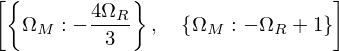

In [4]:
solve([Omega_m_p + Omega_r_p], Omega_m, Omega_r)

### Critical Points

$\left(\Omega_{M}, \Omega_{R}\right) = (0,0) \ \rightarrow\ \Lambda\ \text{dominated}$

$\left(\Omega_{M}, \Omega_{R}\right) = (0,1)\ \rightarrow\ \text{Radiation dominated}$

$\left(\Omega_{M}, \Omega_{R}\right) = (1,0)\ \rightarrow\ \text{Matter dominated}$

In [5]:
Jacobian = Matrix([[diff(Omega_m_p, Omega_m),diff(Omega_m_p, Omega_r)],[diff(Omega_r_p, Omega_m), diff(Omega_r_p, Omega_r)]])

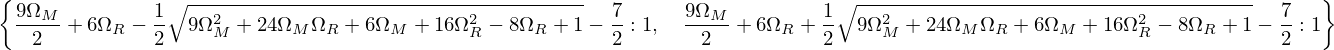

In [6]:
Jacobian.eigenvals()

In [7]:
def eig_vals(Omega_M, Omega_R):
    eig1 = 9*Omega_M/2 + 6*Omega_R - np.sqrt(9*Omega_M**2 + 24*Omega_M*Omega_R + 6*Omega_M + 16*Omega_R**2 - 8*Omega_R + 1)/2 - 7/2
    eig2 = 9*Omega_M/2 + 6*Omega_R + np.sqrt(9*Omega_M**2 + 24*Omega_M*Omega_R + 6*Omega_M + 16*Omega_R**2 - 8*Omega_R + 1)/2 - 7/2
    
    return [eig1, eig2]

M_eigs = eig_vals(1,0)
R_eigs = eig_vals(0,1)
L_eigs = eig_vals(0,0)

### Eigenvalues for the critical point M(1,0)

In [8]:
M_eigs

M(1,0) $\rightarrow$ Saddle point

In [9]:
w_effective(0,0)

### Eigenvalues for the critical point R(0,1)

In [10]:
R_eigs

R(0,1) $\rightarrow$ Unstable (past time attractor) 

In [11]:
w_effective(1,0)

### Eigenvalues for the critical point $\Lambda(0,0)$

In [12]:
L_eigs

$\Lambda$(0,0) $\rightarrow$ Stable (attractor - future time attractor)

In [13]:
w_effective(0,1)

# Stability analysis for a universe with Barotropic fluid and Quintessence

In [113]:
x_prime = Function('x^{\prime}')
y_prime = Function('y^{\prime}')

l = Symbol('\lambda', real=True, positive=True)
w_i = Symbol('w_{i}', real=True, positive=True)
x, y = symbols('x y')

x_prime = Rational(3,2)**Rational(1,2)*l*y**2 + Rational(3,2) * x *((1-w_i)*(x**2 - 1) - y**2 * (1 + w_i))
y_prime = -1 * Rational(3,2)**Rational(1,2)*l*x*y + Rational(3,2) * y * (x**2 * (1 - w_i) + (1 + w_i)*(1-y**2))

In [114]:
solution = solve([x_prime, y_prime], x, y)

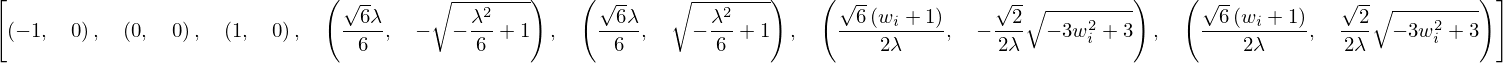

In [115]:
solution

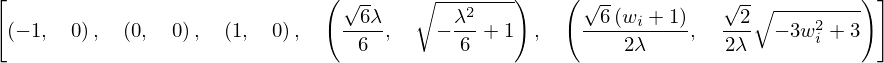

In [116]:
critical_points = [solution[0],solution[1],solution[2],solution[4],solution[6]]
critical_points

### Jacobian

In [117]:
J = Matrix([[diff(x_prime, x),diff(x_prime, y)],[diff(y_prime, x), diff(y_prime, y)]])

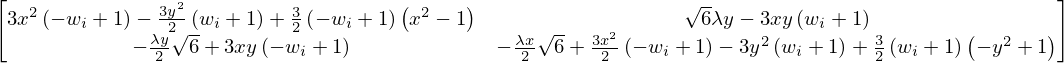

In [126]:
J

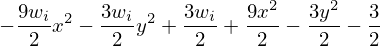

In [118]:
cancel(collect(J[0,0],x))

In [119]:
cancel(collect(J[0,1],x))

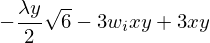

In [120]:
cancel(collect(J[1,0],x))

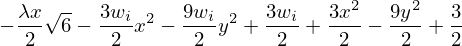

In [121]:
cancel(collect(J[1,1],x))

In [122]:
J_eigenvalues = J.eigenvals()

In [123]:
e1 = -sqrt(6)*l*x/4 - 3*w_i*x**2 - 3*w_i*y**2 + 3*w_i/2 + 3*x**2 - 3*y**2 - sqrt(6)*sqrt(l**2*x**2 - 8*l**2*y**2 - 2*sqrt(6)*l*w_i*x**3 - 2*sqrt(6)*l*w_i*x*y**2 + 2*sqrt(6)*l*x**3 + 14*sqrt(6)*l*x*y**2 - 2*sqrt(6)*l*x + 6*w_i**2*x**4 + 12*w_i**2*x**2*y**2 + 6*w_i**2*y**4 - 12*w_i*x**4 + 12*w_i*x**2 + 12*w_i*y**4 - 12*w_i*y**2 + 6*x**4 - 12*x**2*y**2 - 12*x**2 + 6*y**4 - 12*y**2 + 6)/4
e2 = -sqrt(6)*l*x/4 - 3*w_i*x**2 - 3*w_i*y**2 + 3*w_i/2 + 3*x**2 - 3*y**2 + sqrt(6)*sqrt(l**2*x**2 - 8*l**2*y**2 - 2*sqrt(6)*l*w_i*x**3 - 2*sqrt(6)*l*w_i*x*y**2 + 2*sqrt(6)*l*x**3 + 14*sqrt(6)*l*x*y**2 - 2*sqrt(6)*l*x + 6*w_i**2*x**4 + 12*w_i**2*x**2*y**2 + 6*w_i**2*y**4 - 12*w_i*x**4 + 12*w_i*x**2 + 12*w_i*y**4 - 12*w_i*y**2 + 6*x**4 - 12*x**2*y**2 - 12*x**2 + 6*y**4 - 12*y**2 + 6)/4
    
J_complete = [e1, e2]


In [124]:
J_x_minus = [J_complete[0].subs([(x,-1), (y, 0)]), J_complete[1].subs([(x,-1), (y, 0)])]
J_x_plus = [J_complete[0].subs([(x,1), (y, 0)]), J_complete[1].subs([(x,1), (y, 0)])]
J_I = [J_complete[0].subs([(x,0), (y, 0)]), J_complete[1].subs([(x,0), (y, 0)])]
J_A = [J_complete[0].subs([(x,critical_points[3][0]), (y, critical_points[3][1])]), J_complete[1].subs([(x,critical_points[3][0]), (y, critical_points[3][1])])]
J_C = [J_complete[0].subs([(x,critical_points[4][0]), (y, critical_points[4][1])]), J_complete[1].subs([(x,critical_points[4][0]), (y, critical_points[4][1])])]


In [49]:
def w_effective(x, y, w_i = Symbol('w_{i}')):
    return w_i*(1 - x**2 - y**2) + x**2 - y**2

def eigen_values(l, w_i, x, y):
    eig1 = -np.sqrt(6)*l*x/4 - 3*w_i*x**2 - 3*w_i*y**2 + 3*w_i/2 + 3*x**2 - 3*y**2 - np.sqrt(6)*np.sqrt(l**2*x**2 - 8*l**2*y**2 - 2*np.sqrt(6)*l*w_i*x**3 - 2*np.sqrt(6)*l*w_i*x*y**2 + 2*np.sqrt(6)*l*x**3 + 14*np.sqrt(6)*l*x*y**2 - 2*np.sqrt(6)*l*x + 6*w_i**2*x**4 + 12*w_i**2*x**2*y**2 + 6*w_i**2*y**4 - 12*w_i*x**4 + 12*w_i*x**2 + 12*w_i*y**4 - 12*w_i*y**2 + 6*x**4 - 12*x**2*y**2 - 12*x**2 + 6*y**4 - 12*y**2 + 6)/4
    eig2 = -np.sqrt(6)*l*x/4 - 3*w_i*x**2 - 3*w_i*y**2 + 3*w_i/2 + 3*x**2 - 3*y**2 + np.sqrt(6)*np.sqrt(l**2*x**2 - 8*l**2*y**2 - 2*np.sqrt(6)*l*w_i*x**3 - 2*np.sqrt(6)*l*w_i*x*y**2 + 2*np.sqrt(6)*l*x**3 + 14*np.sqrt(6)*l*x*y**2 - 2*np.sqrt(6)*l*x + 6*w_i**2*x**4 + 12*w_i**2*x**2*y**2 + 6*w_i**2*y**4 - 12*w_i*x**4 + 12*w_i*x**2 + 12*w_i*y**4 - 12*w_i*y**2 + 6*x**4 - 12*x**2*y**2 - 12*x**2 + 6*y**4 - 12*y**2 + 6)/4
    
    return eig1, eig2
    

In [61]:
w_effective(critical_points[0][0],critical_points[0][1])

In [62]:
w_effective(critical_points[1][0],critical_points[1][1])

In [63]:
w_effective(critical_points[2][0],critical_points[2][1])

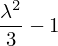

In [64]:
w_effective(critical_points[3][0],critical_points[3][1])

In [66]:
simplify(w_effective(critical_points[4][0],critical_points[4][1]))